# **Bem-vindo ao mundo de dados!**



Essa an√°lise √© para voc√™ que possui curiosidade sobre os sal√°rios e caracter√≠sticas dos profissionais de dados mundo a fora.

Iremos explorar diversas quest√µes: a taxa de trabalho remoto, o ano de trabalho, o tipo de contrata√ß√£o, n√≠vel de experi√™ncia, tamanho da empresa, e claro, o **sal√°rio!**

Vamos come√ßar!?

#Bibliotecas

In [17]:
#Bibliotecas que ser√£o utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

##  Cores

In [18]:
sns.set_palette("crest")
sns.set_style("whitegrid")

# Importando o dataset

In [19]:
#Importa√ß√£o do dataset atrav√©s do github
ds_salaries = pd.read_csv("https://raw.githubusercontent.com/gustavo-candidoo/data-science/main/ds-salaries-eda/ds_salaries.csv")

##  Dicion√°rio e link dos dados

Link para o dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

work_year: ano de trabalho


experience_level: n√≠vel de experi√™ncia (EN: Entry-Level, MI: Mid-Level,  SE: Senior-Level,  EX: Executive Level)


employment_type: tipo de de emprego (FT: Full-Time, CT: Contract-Time, PT: Part-Time, FL: Freelancer)


job_title: nome do cargo


salary: sal√°rio na moeda local


salary_currency: tipo de moeda do sal√°rio


salary_in_usd: sal√°rio convertido em d√≥lar


employee_residence: local de moradia do empregado


remote_ratio: taxa de trabalho remoto


company_local: local da empresa


company_size: tamanho da empresa (S: small, M: medium, L: large)

# Explorando

In [20]:
#an√°lise inicial
ds_salaries.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [21]:
#amostra aleat√≥ria
ds_salaries.sample(5)

work_year experience_level employment_type             job_title  \
2185       2022               SE              FT     Research Engineer   
3068       2022               EX              FT  Data Science Manager   
2255       2022               SE              FT          Data Analyst   
2020       2022               MI              FT          Data Analyst   
2538       2022               SE              FT          Data Analyst   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
2185  250000             USD         250000                 US             0   
3068  175100             USD         175100                 US             0   
2255  130000             USD         130000                 US             0   
2020   75000             USD          75000                 US           100   
2538   48000             EUR          50432                 ES             0   

     company_location company_size  
2185               US            M  
3068               US            M  
2255               US            M  
2020               US            M  
2538               ES            M

In [22]:
#verificando o tipo de cada coluna
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [23]:
#resumo est√°tistico
ds_salaries.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

##  Filtrando

In [24]:
#podemos dropar algumas colunas que n√£o ser√£o interessantes na nossa an√°lise
#droparemos o ind√≠ce, o local de moradia e da empresa, o sal√°rio e o tipo de moeda do sal√°rio, pois analisaremos somente quanto ganha em d√≥lar
ds_salaries.drop(columns=['salary', 'salary_currency', 'employee_residence', 'company_location'], inplace = True)
ds_salaries.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary_in_usd  remote_ratio company_size  
0          85847           100            L  
1          30000           100            S  
2          25500           100            S  
3         175000           100            M  
4         120000           100            M

In [25]:
#verificando o tamanho
shape = ds_salaries.shape
print(f"O dataset possui {shape[0]} linhas e {shape[1]} colunas.")

O dataset possui 3755 linhas e 7 colunas.


### Valores Missings

In [26]:
#o dataset n√£o possui missings
ds_salaries.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

#  An√°lise Explorat√≥ria

##  An√°lise Geral

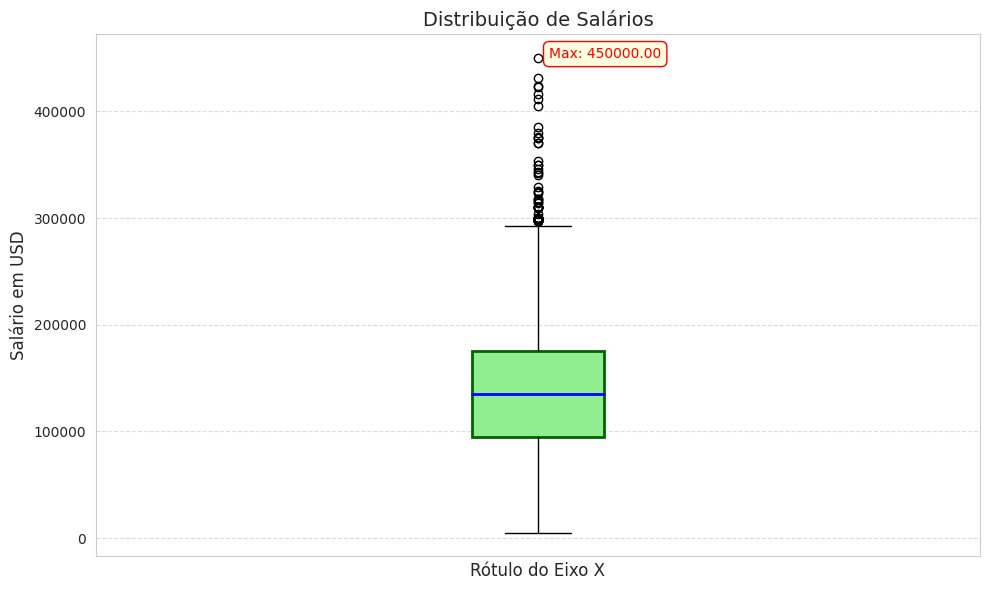

In [27]:
box_color = 'lightgreen'
median_color = 'blue'
max_value_color = 'red'

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(ds_salaries['salary_in_usd'], patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor=box_color, linewidth=2, edgecolor='darkgreen')
for median in boxplot['medians']:
    median.set(color=median_color, linewidth=2)

plt.xlabel("R√≥tulo do Eixo X", fontsize=12)
plt.ylabel("Sal√°rio em USD", fontsize=12)
plt.title("Distribui√ß√£o de Sal√°rios", fontsize=14)

plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([])

max_salary = ds_salaries['salary_in_usd'].max()

plt.annotate(f'Max: {max_salary:.2f}', xy=(1, max_salary), xytext=(8, 0),
             textcoords='offset points', fontsize=10, color=max_value_color,
             bbox=dict(boxstyle='round,pad=0.4', edgecolor=max_value_color, facecolor='lightyellow'))

plt.tight_layout()

plt.show()




1.   √â poss√≠vel perceber que a mediana dos sal√°rios √© de 100.00USD, ou seja 50% das pessoas ganham acima disso e os outros 50%, abaixo.
2.   H√° alguns valores outlier, por√©m um se destaca, que √© de aproximadamente USD600.000. Podemos explorar e entender.
3. H√° sal√°rios muito baixos em d√≥lar. Provavelmente s√£o de pa√≠ses subdesenvolvidos ou emergentes.


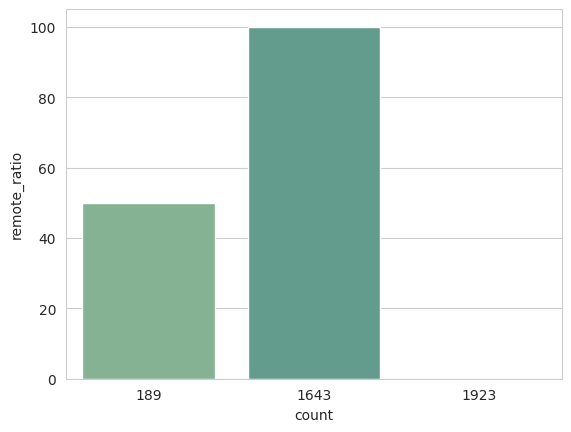

In [28]:
#dataframe para contar quantas vezes os valores da coluna remote_ratio se repetem
remote_ratio_count = ds_salaries['remote_ratio'].value_counts()
remote_ratio_count = pd.DataFrame(remote_ratio_count).reset_index()
rename = ['remote_ratio', 'count']
remote_ratio_count.columns = rename

sns.barplot(
    data = remote_ratio_count,
    x = 'count',
    y = 'remote_ratio'
)
plt.show()

Percebe-se que a maioria dos indiv√≠duos analisados adotam uma abordagem de trabalho remoto em tempo integral. Em contraste, uma parcela menor opta pelo modelo de trabalho presencial, correspondendo a 0% de home office. Uma por√ß√£o intermedi√°ria dos participantes adota um modelo h√≠brido, dividindo igualmente suas responsabilidades entre trabalho presencial e remoto, totalizando 50%. Essa variedade de pr√°ticas reflete as diversas abordagens que as pessoas t√™m adotado em resposta √†s mudan√ßas no ambiente de trabalho moderno.

### Outlier

In [29]:
#explorando os outliers, valores acima de ~USD300.000
ds_salary_outlier = ds_salaries[ds_salaries['salary_in_usd'] > 300000]
ds_salary_outlier

work_year experience_level employment_type  \
33         2023               SE              FT   
68         2023               SE              FT   
133        2023               SE              FT   
145        2023               SE              FT   
163        2023               SE              FT   
228        2023               EX              FT   
358        2023               SE              FT   
478        2023               EX              FT   
488        2023               SE              FT   
528        2023               SE              FT   
649        2023               SE              FT   
845        2023               MI              FT   
860        2023               EX              FT   
1007       2023               EX              FT   
1097       2023               SE              FT   
1099       2023               SE              FT   
1105       2023               SE              FT   
1116       2023               SE              FT   
1153       2023               EX              FT   
1258       2022               SE              FT   
1286       2023               SE              FT   
1288       2023               SE              FT   
1311       2023               SE              FT   
1396       2023               EX              FT   
1421       2023               SE              FT   
1427       2023               EX              FT   
1722       2023               SE              FT   
1932       2022               EX              FT   
2011       2022               MI              FT   
2279       2022               EX              FT   
2359       2022               SE              FT   
2374       2022               SE              FT   
2406       2022               SE              FT   
2555       2022               SE              FT   
3410       2022               EX              FT   
3463       2022               SE              FT   
3468       2022               SE              FT   
3522       2020               MI              FT   
3675       2021               EX              CT   
3697       2020               EX              FT   
3747       2021               MI              FT   
3750       2020               SE              FT   

                               job_title  salary_in_usd  remote_ratio  \
33              Computer Vision Engineer         342810             0   
68                     Applied Scientist         309400             0   
133            Machine Learning Engineer         342300             0   
145            Machine Learning Engineer         318300           100   
163                    Applied Scientist         309400             0   
228                         Head of Data         329500             0   
358            Machine Learning Engineer         304000           100   
478             Director of Data Science         353200             0   
488                       Data Scientist         317070             0   
528                         AI Scientist         423834             0   
649                       Data Architect         376080           100   
845                   Research Scientist         340000           100   
860                        Data Engineer         310000           100   
1007                       Data Engineer         310000           100   
1097                      Data Scientist         300240             0   
1099                      Data Scientist         300240             0   
1105                      Data Scientist         370000             0   
1116           Machine Learning Engineer         323300             0   
1153                       Data Engineer         310000           100   
1258  Machine Learning Software Engineer         375000           100   
1286           Machine Learning Engineer         318300           100   
1288                        Data Analyst         385000             0   
1311                  Research Scientist         370000             0   
1396             

üò± Podemos ver que o respons√°vel pelo sal√°rio de USD600.000 √© um executivo e engenheiro de dados principal de uma empresa grande e trabalha 100% remoto.

üí≤ Enquanto os outros outliers tamb√©m trabalham remotamente, em sua maioria, em empresas m√©dia e grandes. Quanto ao n√≠vel de experi√™ncia, √© bem diversificado, com alguns mid-level e nenhum entry-level, mas predominando senior-level e executive-level.


##  Pergunta de neg√≥cio



*   Quais s√£o os maiores sal√°rios? E os menores?
*   Durante os anos, o sal√°rios aumentou? Ou diminuiu?
*   An√°lise de correla√ß√£o com o sal√°rio.
*   Como a propor√ß√£o do trabalho remoto afetou o sal√°rio ao longo dos anos?



### Maiores e menores sal√°rios

In [30]:
#agrupar por cargo e aplicar a mediana na coluna sal√°rio
ds_salaries_median = ds_salaries.groupby("job_title")['salary_in_usd'].median()
ds_salaries_median = pd.DataFrame(ds_salaries_median).reset_index()

In [31]:
#filtrar os top10 maiores sal√°rios
top_10_salaries = ds_salaries_median.nlargest(10, 'salary_in_usd')
top_10_salaries.head(10)

job_title  salary_in_usd
46               Data Science Tech Lead       375000.0
19                 Cloud Data Architect       250000.0
35                            Data Lead       212500.0
28                  Data Analytics Lead       211254.5
58                         Head of Data       202500.0
83              Principal Data Engineer       192500.0
8                     Applied Scientist       191737.5
85  Principal Machine Learning Engineer       190000.0
45                 Data Science Manager       183780.0
34         Data Infrastructure Engineer       183655.0

In [32]:
#plot do gr√°fico com as 10 maiores m√©dias salariais
fig = px.bar(top_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com maior m√©dia salarial'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

√â poss√≠vel perceber que os maiores sal√°rios s√£o para cargos de gest√£o, o que n√£o reflete muito bem a realidade, pois a maioria dos profissionais de dados est√£o no operacional. √â necess√°rio fazer uma an√°lise mais pr√°tica e voltada para a massa.

In [33]:
#filtrar os top10 menores sal√°rios
bottom_10_salaries = ds_salaries_median.nsmallest(10, 'salary_in_usd').sort_values(by='salary_in_usd', ascending=True)
bottom_10_salaries.head(10)

job_title  salary_in_usd
80                  Power BI Developer         5409.0
87              Product Data Scientist         8000.0
0        3D Computer Vision Researcher        15000.0
91                  Staff Data Analyst        15000.0
86                Product Data Analyst        20000.0
9        Autonomous Vehicle Technician        26277.5
22             Compliance Data Analyst        30000.0
82            Principal Data Architect        38154.0
72  Machine Learning Research Engineer        43096.0
61                     Insight Analyst        46786.0

In [34]:
#plot do gr√°fico com as 10 menores m√©dias salariais
fig = px.bar(bottom_10_salaries,
             y='job_title',
             x='salary_in_usd',
             orientation='h',
             title='Top 10 cargos com menores m√©dias salariais'
             )

fig.update_yaxes(autorange="reversed")

fig.show()

Agora √© poss√≠vel ver uma an√°lise mais realista, com profiss√µes mais comuns praticadas por profissionais da √°rea. No entanto, por ser mais frequente, existem diversos freelancers, o que ocasiona sal√°rios mais baixos, ao contr√°rio dos cargos de gest√£o, em que s√£o full time e em raros casos, outro tipo de contrato de trabalho, e como visto anteriormente, ter mais experi√™ncia √© uma forte feature para o aumento de sal√°rio.

#### An√°lise salarial das 3 principais profiss√µes

Como um profissional de dados na maioria dos casos ser√° um analista, cientista ou engenheiro, podemos filtrar somente esses tr√™s cargos para fazer uma an√°lise mais detalhada e voltada para realidade.

In [35]:
#filtrar somente as tr√™s principais profiss√µes
main_jobs = ["Data Scientist", "Data Analyst", "Data Engineer"]
ds_main_jobs = ds_salaries[ds_salaries['job_title'].isin(main_jobs)]

In [36]:
#dataframe das tr√™s principais profiss√µes
ds_main_jobs = pd.DataFrame(ds_main_jobs).reset_index()
ds_main_jobs.head()

index  work_year experience_level employment_type       job_title  \
0      3       2023               SE              FT  Data Scientist   
1      4       2023               SE              FT  Data Scientist   
2      7       2023               SE              FT  Data Scientist   
3      8       2023               SE              FT  Data Scientist   
4      9       2023               SE              FT  Data Scientist   

   salary_in_usd  remote_ratio company_size  
0         175000           100            M  
1         120000           100            M  
2         219000             0            M  
3         141000             0            M  
4         147100             0            M

In [37]:
#mediana salarial das tr√™s principais profiss√µes
ds_median_main_jobs = ds_main_jobs.groupby("job_title")['salary_in_usd'].median()
ds_median_main_jobs = pd.DataFrame(ds_median_main_jobs).reset_index()

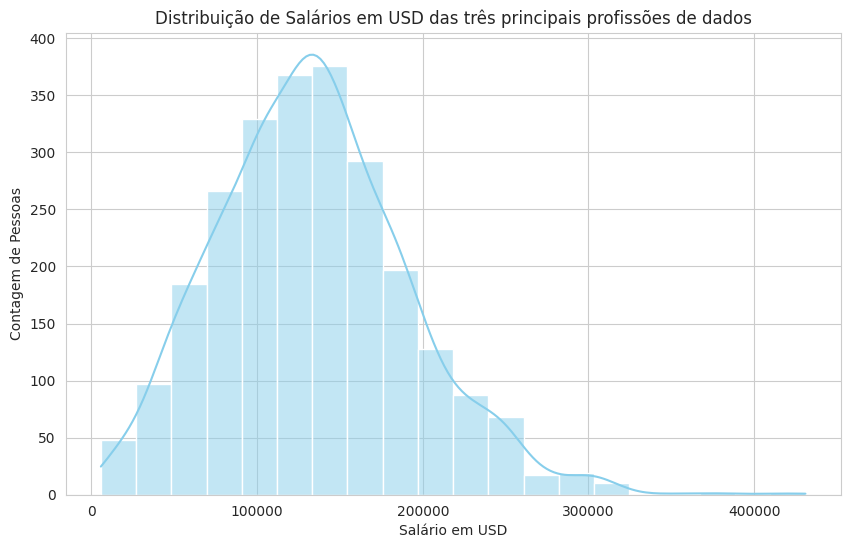

In [38]:
#histograma do sal√°rio das tr√™s principais profiss√µes
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=ds_main_jobs, x='salary_in_usd', bins=20, kde=True, color='skyblue')

plt.title('Distribui√ß√£o de Sal√°rios em USD das tr√™s principais profiss√µes de dados')
plt.xlabel('Sal√°rio em USD')
plt.ylabel('Contagem de Pessoas')

plt.show()

O histograma apresenta uma distribui√ß√£o normal com forte concentra√ß√£o nos USD100.000, que √© o sal√°rio m√©dio das tr√™s profiss√µes. H√° diversos profissionais ganhando menos, provavelmente freelancers e colaboradores de empresas pequenas. E do outro lado, alguns outliers acima da m√©dia.

### An√°lise temporal do sal√°rio

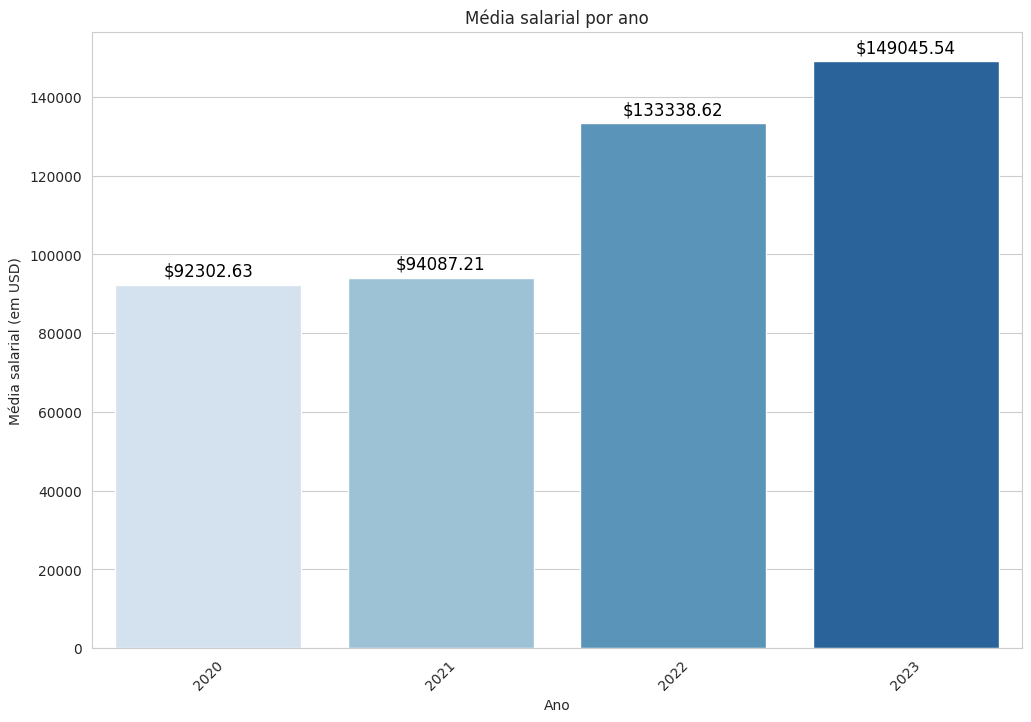

In [39]:
#m√©dia salarial por ano
mean_salaries_work_year = ds_salaries.groupby("work_year")['salary_in_usd'].mean()
mean_salaries_work_year = pd.DataFrame(mean_salaries_work_year).reset_index()

#plot do gr√°fico
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=mean_salaries_work_year, x='work_year', y='salary_in_usd', palette='Blues')

for p in ax.patches:
    ax.annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.ylabel("M√©dia salarial (em USD)")
plt.xlabel("Ano")
plt.title("M√©dia salarial por ano")
plt.xticks(rotation=45)
plt.show()

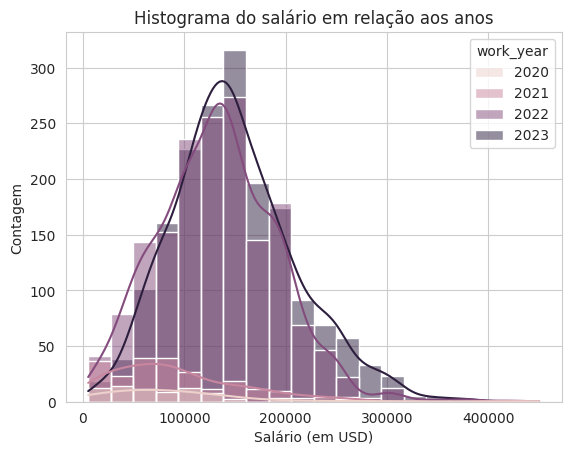

In [40]:
#histograma do sal√°rio x contagem de sal√°rios por ano
sns.histplot(data=ds_salaries, x='salary_in_usd', hue='work_year', bins=20, kde=True, common_norm=False)

plt.title("Histograma do sal√°rio em rela√ß√£o aos anos")
plt.xlabel("Sal√°rio (em USD)")
plt.ylabel("Contagem")

plt.show()


Analisando o histograma salarial ao longo dos anos, √© evidente um aumento m√©dio de sal√°rios. Notavelmente, a diferen√ßa entre 2022 e 2021 √© significativa, indicando uma melhoria substancial no mercado de trabalho. A transi√ß√£o de 2020 para 2021 mostrou uma diferen√ßa menor, sugerindo estabilidade nesse per√≠odo.

### An√°lise de Correla√ß√£o

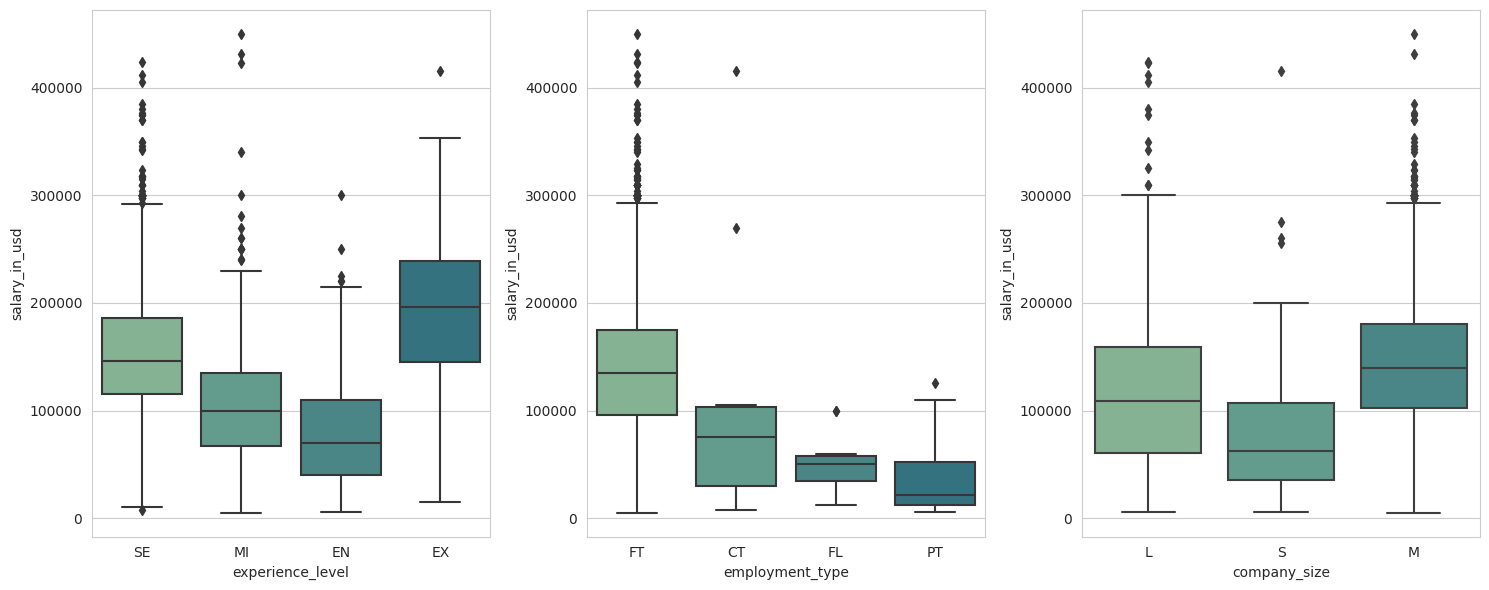

In [41]:
#boxplot para verificar a rela√ß√£o do sal√°rio x features
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='experience_level', ax=ax[0])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='employment_type', ax=ax[1])
sns.boxplot(data=ds_salaries, y='salary_in_usd', x='company_size', ax=ax[2])
plt.tight_layout()

1. Sal√°rio e n√≠vel de experi√™ncia: √â poss√≠vel perceber que o sal√°rio tende aumentar conforme a qualifa√ß√£o aumenta, como era de se esperar. 50% dos profissionais entry-level ganham em torno de USD60.000, enquanto experienced-level ganham aproximadamente USD170.000.
2. Sal√°rio e tipo de emprego: Colabores full time e contract time possuem medianas parecidas, com uma dispers√£o muito maior de profissionais full time. Part time e free lance tendem a ganhar menos.
3. Sal√°rio e tamanho da empresa: Profissionais que trabalham em empresa de tamanho m√©dio e grande tendem a ganhar sal√°rio parecidos. J√° em empresa pequena, h√° uma queda no sal√°rio.

### Trabalho Remoto

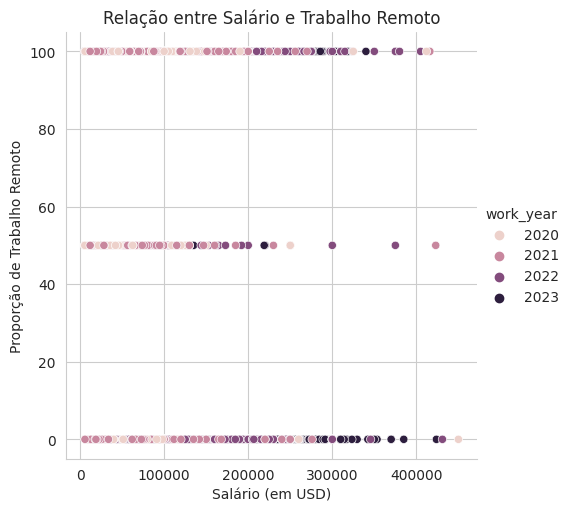

In [42]:
#gr√°fico para verificar a rela√ß√£o entre a taxa de trabalho remoto, ano de trabalho e o sal√°rio.
ds_salaries_remote_year = ds_salaries.drop(columns=['experience_level', 'employment_type', 'job_title'])

sns.relplot(
    data=ds_salaries_remote_year,
    x='salary_in_usd',
    y='remote_ratio',
    hue='work_year'
)


plt.xlabel("Sal√°rio (em USD)")
plt.ylabel("Propor√ß√£o de Trabalho Remoto")
plt.title("Rela√ß√£o entre Sal√°rio e Trabalho Remoto")

plt.show()

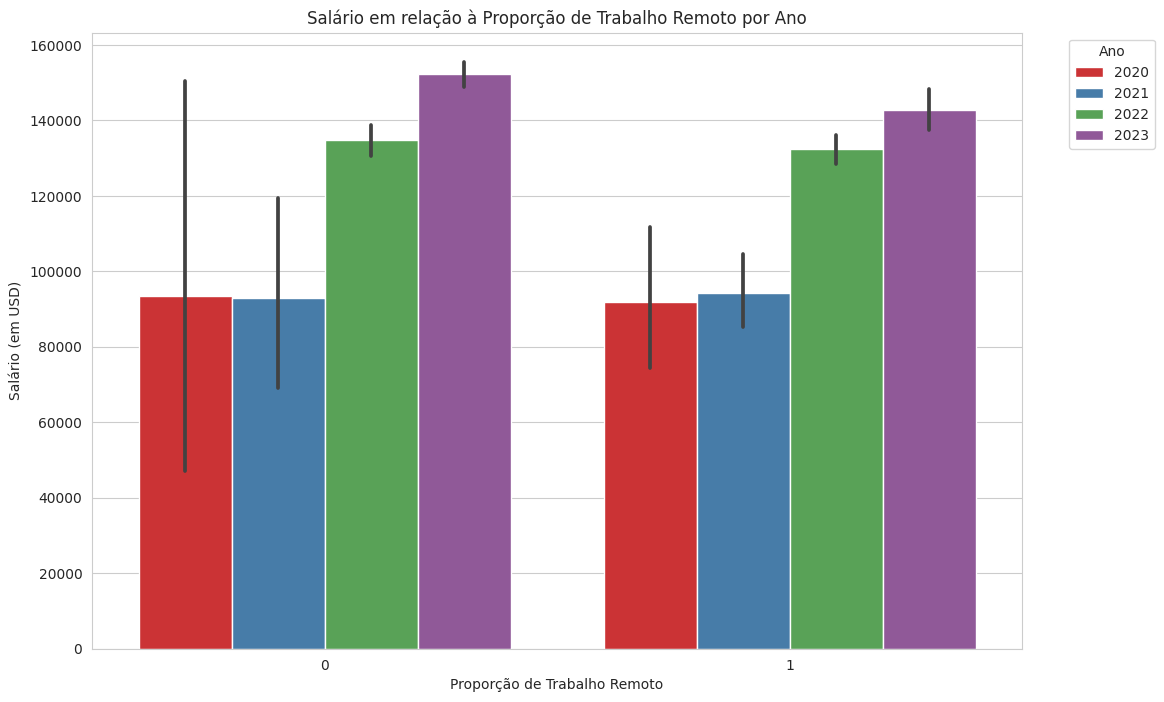

In [43]:
#gr√°fico mais apresent√°vel para verificar a rela√ß√£o entre trabalho remoto, ano de trabalho e sal√°rio
ds_salaries['remote_ratio'] = np.where(ds_salaries['remote_ratio'] > 0, 1, 0)

plt.figure(figsize=(12, 8))
sns.barplot(data=ds_salaries, x='remote_ratio', y='salary_in_usd', hue='work_year', palette='Set1')

plt.xlabel("Propor√ß√£o de Trabalho Remoto")
plt.ylabel("Sal√°rio (em USD)")
plt.title("Sal√°rio em rela√ß√£o √† Propor√ß√£o de Trabalho Remoto por Ano")

plt.legend(title="Ano", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()

Em 2022, observamos o ano com a mais alta taxa de trabalho remoto, marcando um ponto alto nessa tend√™ncia. Esse aumento significativo representa uma not√°vel mudan√ßa nas din√¢micas do mercado de trabalho em compara√ß√£o a anos anteriores. No per√≠odo de 2020 a 2022 houve uma not√°vel crescente na ado√ß√£o do trabalho remoto, refletindo a adapta√ß√£o das empresas √†s novas realidades e demandas, assim como a busca por maior flexibilidade por parte dos profissionais. Essa transforma√ß√£o profunda est√° moldando a forma como as organiza√ß√µes operam e como os indiv√≠duos conduzem suas carreiras.

# Conclus√£o

![Imagem de exemplo](https://blog.bighouseweb.com.br/wp-content/uploads/2022/01/Linguagens-de-programacao-1140x660.jpg)

**A an√°lise revelou uma influ√™ncia direta do sal√°rio de um profissional de dados em rela√ß√£o a todos os fatores considerados. Ficou evidente que as vari√°veis como experi√™ncia, tipo de emprego, t√≠tulo da fun√ß√£o, ano e at√© mesmo a propor√ß√£o de trabalho remoto t√™m um impacto consider√°vel nas remunera√ß√µes.**

**A m√©dia salarial de aproximadamente 100 mil d√≥lares anuais para as principais profiss√µes destaca a atratividade da carreira em ci√™ncia de dados, sendo uma recompensa justa pelo conjunto de habilidades exigido e pela capacidade de alavancar dados para tomar decis√µes estrat√©gicas. Al√©m disso, h√° uma demanda crescente na √°rea.**

**A tend√™ncia crescente do trabalho remoto n√£o passou despercebida. O aumento nas taxas de trabalho remoto ao longo dos anos mostra que a flexibilidade geogr√°fica se tornou uma norma e uma expectativa crescente. Isso n√£o apenas amplia as oportunidades para profissionais de dados, mas tamb√©m est√° redefinindo a forma como as organiza√ß√µes estruturam suas opera√ß√µes e como os talentos buscam equil√≠brio entre vida pessoal e profissional.**

**Em resumo, a carreira em ci√™ncia de dados √© recompensadora e din√¢mica, com sal√°rios atraentes e uma forte tend√™ncia de trabalho remoto. Aqueles que buscam essa √°rea est√£o em uma posi√ß√£o privilegiada para moldar o futuro dos neg√≥cios e da tecnologia por meio da an√°lise de dados.**